# Computer Representations of Data

The core to data science and machine learning is data. But how do computers represent data? Before we start getting into mathematics, let's find out exactly what an "artificial intellegence" has at their disposal to learn from.

## Data is Represented as Arrays

Let's take a look at some fruit. Using the Images.jl library we can load in some images.

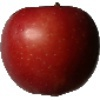

In [1]:
using Images
apple = load("10_100.jpg")

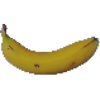

In [2]:
banana = load("104_100.jpg")

Here we have images of apples and bananas. We would like to eventually build a program that can automatically distinguish between the two. However, the computer doesn't "see" an apple or a banana, instead it just has numbers. An image is encoded in what's called an array.

[Cartoon of an Array]

An array is a bunch of connected numbers. For example, our `apple` is a 100x100 image:

In [28]:
size(apple)

(100, 100)

We can grab the number at any of the locations using the brackets `[i,j]` to grab the value at a specific point. Let's get the `(40,60)`th pixel:

In [29]:
apple[40,60]

## Colors as Numbers

At each point of the image it's a color. Computers store colors in RGB format, that is they store a 0-1 value of red, green, and blue where 0 means none of that color and 1 means the brightest form of that color. For example, we can pull out the `red` value like:

In [39]:
red_value = float(red(apple[40,60]))
green_value = float(green(apple[40,60]))
blue_value = float(blue(apple[40,60]))
print("The RGB values are ($red_value, $green_value, $blue_value)")

The RGB values are (0.52156866, 0.098039225, 0.050980397)

Since the red value is high while the others are low, this means that at pixel `(40,60)`, the picture of the apple is very red. If we do the same at one of the corners of the picture:

In [42]:
red_value = float(red(apple[1,1]))
green_value = float(green(apple[1,1]))
blue_value = float(blue(apple[1,1]))
print("The RGB values are ($red_value, $green_value, $blue_value)")

The RGB values are (0.9960785, 1.0, 0.9843138)

we see that every color is bright which means white. 

## Working on an Image as a Whole

In Julia, to apply a function to the whole array we add a `.`, so the following gives us the `red` value at every point:

In [41]:
float.(red.(apple))

100×100 Array{Float32,2}:
 0.996078  1.0       1.0       1.0       …  1.0       1.0  1.0  1.0  1.0
 0.984314  0.996078  1.0       1.0          0.996078  1.0  1.0  1.0  1.0
 0.980392  0.984314  0.996078  1.0          1.0       1.0  1.0  1.0  1.0
 0.968628  0.980392  0.996078  1.0          0.996078  1.0  1.0  1.0  1.0
 0.968628  0.980392  1.0       1.0          0.996078  1.0  1.0  1.0  1.0
 0.980392  0.984314  1.0       1.0       …  0.996078  1.0  1.0  1.0  1.0
 0.992157  0.992157  1.0       1.0          1.0       1.0  1.0  1.0  1.0
 1.0       1.0       1.0       0.996078     1.0       1.0  1.0  1.0  1.0
 1.0       1.0       1.0       0.996078     1.0       1.0  1.0  1.0  1.0
 1.0       1.0       1.0       0.992157     1.0       1.0  1.0  1.0  1.0
 1.0       1.0       1.0       0.992157  …  1.0       1.0  1.0  1.0  1.0
 1.0       1.0       0.992157  0.992157     0.988235  1.0  1.0  1.0  1.0
 1.0       1.0       0.992157  0.992157     0.996078  1.0  1.0  1.0  1.0
 ⋮                       

Julia's [mathematical standard library](https://docs.julialang.org/en/stable/stdlib/math/#Mathematics-1) has many mathematical functions built in. One of them is the `mean` function which computes the average value. If we apply this to our apple:

In [44]:
mean(float.(red.(apple)))

0.57016706f0

we see that the value is between the amount of red in the apple and the amount of red in the white background. Somehow we need to teach a computer use this information about picture to recognize there's an apple there?

## A Quick Riddle

Here's a quick riddle. Let's check the average value of red in the image of the banana.

In [49]:
mean(float.(red.(banana)))

0.90400153f0

Oh no, that's more red than our apple? This isn't a mistake and is actually true! Before you move onto the next excerise, example the images of the apple and the banana very carefully and see if you can explain why this is expected. 